In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 데이터 로드
file_path = r"C:\Users\ckstn\OneDrive\바탕 화면\인공지능개론\deeplearning-application\week3\car_evaluation.csv"
df = pd.read_csv(file_path)

df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [26]:
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [28]:
df.columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']

In [30]:
df.columns

Index(['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety',
       'output'],
      dtype='object')

In [32]:
df

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [34]:
# 결측치 확인 및 제거
df.isnull().sum()

price           0
maint           0
doors           0
persons         0
lug_capacity    0
safety          0
output          0
dtype: int64

In [36]:
# 범주형 데이터를 숫자로 변환
label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [38]:
# 레이블 확인
df['output'].value_counts()

output
2    1209
0     384
1      69
3      65
Name: count, dtype: int64

In [40]:
# 데이터 분리
X = df.drop('output', axis=1).values
y = df['output'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# 모델 학습 및 평가
accuracies = {}

In [44]:
# 결정 트리 모델 학습 및 평가
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracies["Decision Tree"] = accuracy_score(y_test, y_pred_dt)

print("결정 트리 정확도:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, zero_division=1))

결정 트리 정확도: 0.9710982658959537
Confusion Matrix:
 [[ 73   2   0   2]
 [  2  12   0   1]
 [  1   0 236   0]
 [  0   2   0  15]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        77
           1       0.75      0.80      0.77        15
           2       1.00      1.00      1.00       237
           3       0.83      0.88      0.86        17

    accuracy                           0.97       346
   macro avg       0.89      0.91      0.90       346
weighted avg       0.97      0.97      0.97       346



In [46]:
# 랜덤 포레스트 모델 학습 및 평가
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracies["Random Forest"] = accuracy_score(y_test, y_pred_rf)

print("\n랜덤 포레스트 정확도:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, zero_division=1))


랜덤 포레스트 정확도: 0.9624277456647399
Confusion Matrix:
 [[ 72   1   3   1]
 [  2  10   0   3]
 [  1   0 236   0]
 [  2   0   0  15]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.91      0.67      0.77        15
           2       0.99      1.00      0.99       237
           3       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.91      0.87      0.88       346
weighted avg       0.96      0.96      0.96       346



In [48]:
# 로지스틱 회귀 모델 학습 및 평가
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracies["Logistic Regression"] = accuracy_score(y_test, y_pred_lr)

print("\n로지스틱 회귀 정확도:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, zero_division=1))


로지스틱 회귀 정확도: 0.684971098265896
Confusion Matrix:
 [[ 12   0  64   1]
 [  2   0  13   0]
 [ 13   0 224   0]
 [ 11   0   5   1]]
              precision    recall  f1-score   support

           0       0.32      0.16      0.21        77
           1       1.00      0.00      0.00        15
           2       0.73      0.95      0.83       237
           3       0.50      0.06      0.11        17

    accuracy                           0.68       346
   macro avg       0.64      0.29      0.28       346
weighted avg       0.64      0.68      0.62       346



In [50]:
# 서포트 벡터 머신 모델 학습 및 평가
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracies["SVM"] = accuracy_score(y_test, y_pred_svm)

print("\n서포트 벡터 머신 정확도:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, zero_division=1))


서포트 벡터 머신 정확도: 0.7167630057803468
Confusion Matrix:
 [[ 11   0  66   0]
 [  0   0  15   0]
 [  0   0 237   0]
 [ 10   0   7   0]]
              precision    recall  f1-score   support

           0       0.52      0.14      0.22        77
           1       1.00      0.00      0.00        15
           2       0.73      1.00      0.84       237
           3       1.00      0.00      0.00        17

    accuracy                           0.72       346
   macro avg       0.81      0.29      0.27       346
weighted avg       0.71      0.72      0.63       346



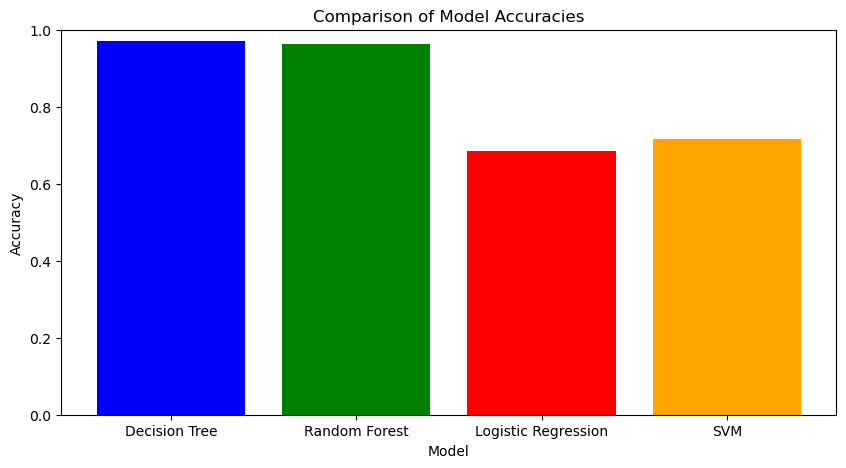

In [52]:
# 정확도 시각화
plt.figure(figsize=(10,5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.show()